In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import proplot as pplt

In [7]:
# 读取数据
# df = pd.read_excel(r'../数据/Q2高钾.xlsx')
df = pd.read_excel(r'../数据/Q2铅钡.xlsx')
df=df.fillna(0)

# 无监督聚类
twss=[]
sa = []
X = df

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init= 'k-means++')
    kmeans.fit(X)
    Ypreds=kmeans.predict(X)
    twss.append(kmeans.inertia_)
    if i>1:
        sa.append(silhouette_score(X, Ypreds))

AttributeError: 'AgglomerativeClustering' object has no attribute 'inertia_'

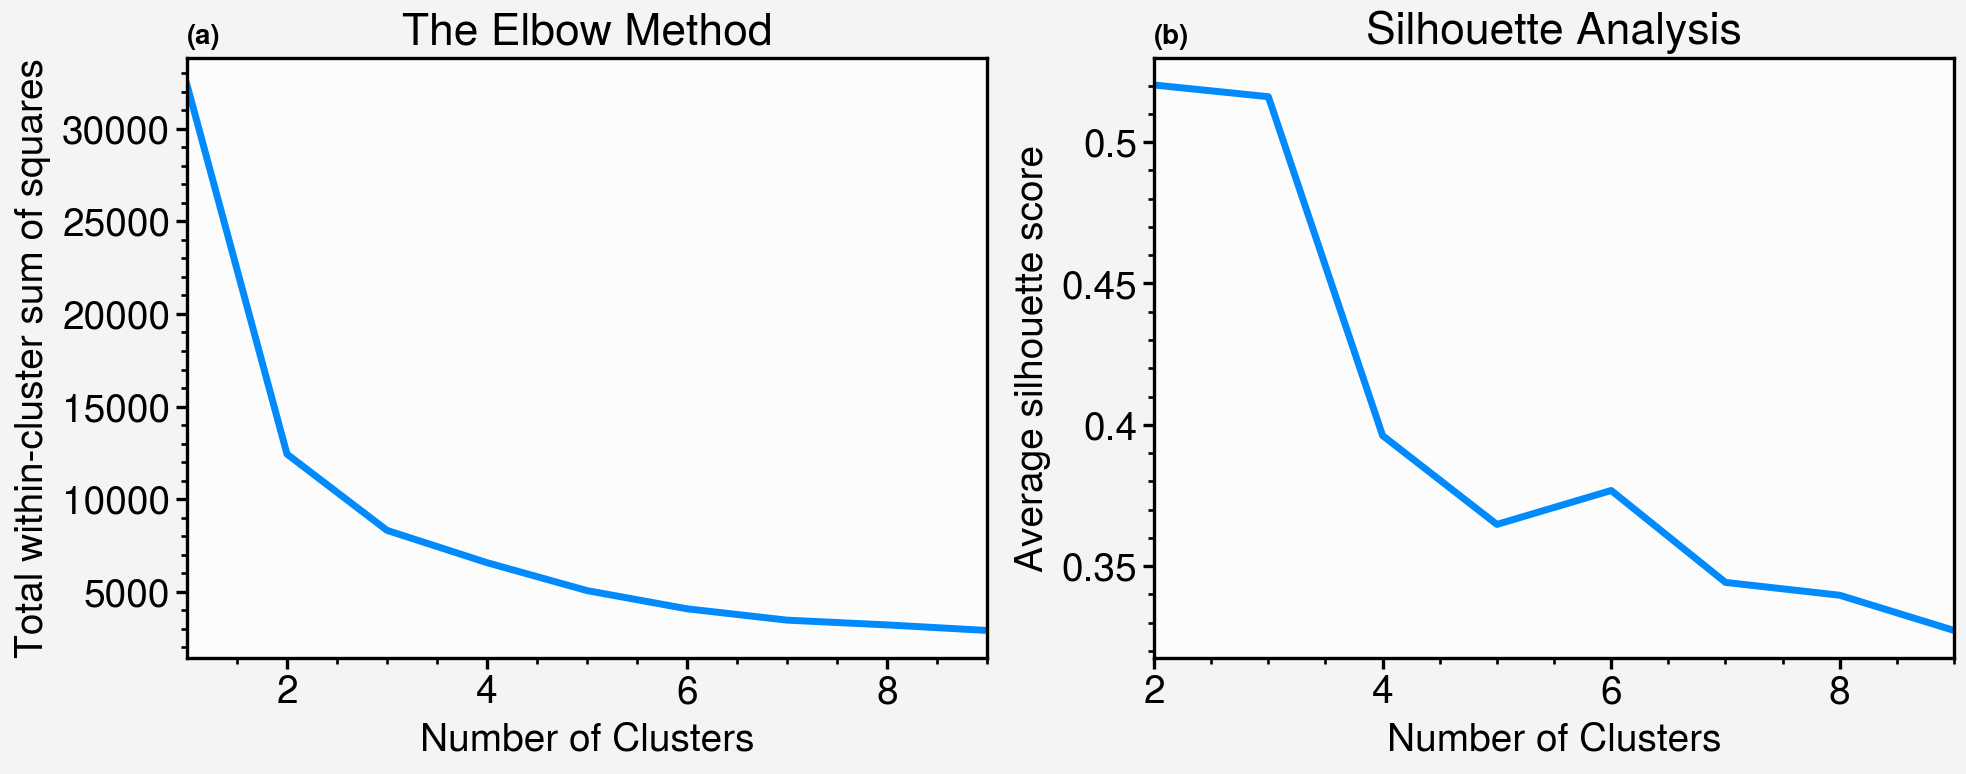

In [29]:
# 绘图
fig, ax = pplt.subplots(
                        refheight= 3, 
                        refwidth= 4,  #对单个图而言
                        ncols=2, 
                        share= False, 
                        )
ax[0].plot(range(1,10), twss, lw= 2.5, 
        c= '#008afb',
        )
ax[0].format(title= 'The Elbow Method',
             xlabel= 'Number of Clusters',
             ylabel= 'Total within-cluster sum of squares'
             )
ax[1].plot(range(2,10), sa, lw= 2.5,
        c= '#008afb',
        )
ax[1].format(title= 'Silhouette Analysis',
             xlabel= 'Number of Clusters',
             ylabel= 'Average silhouette score'
             )
ax.format(
          xlabelsize= 14,
          ylabelsize= 14,
          xticklabelsize= 14,   #ticklabel大小
          yticklabelsize= 14,   #ticklabel大小
          titlesize= 16,
          alpha= 0.8,
          abc= '(a)',           #子图角标
          linewidth = 1.2,      #axes边框宽度
          grid= False,
          )
plt.savefig(r'../图片/Q2_2_聚类_铅钡.svg', dpi= 300)